# **PHYS 481 - Computational Physics II**

## **Assignment #2 - Images and Filters**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a2_scottsalmon.ipynb

### **DATES:** 2024/09/11 - 2024/09/17


### Question 1

Load the file 'mandrill.png' using matplotlib and perform some basic manipulations on it. For each of these, display the original and the altered image side-by-side with no rescaling of the pixel size. You can use the helper function in the template. 

a. Create a 10-pixel wide vertical black line through the middle of the image by replacing data values in the image with zeroes. Display the original and the altered image side-by-side.

b. Transpose the original image. Display the original and the altered image side-by-side.
    
c. "Posterize" the original image by reducing the number of different color levels in each channel from 256 to 2. In other words, reduce the precision in the data values in each color channel (R,G,B) so they assume only the value 0 or 1, and no values in between. Display the original and the altered image side-by-side.

In [23]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Helper function for this assignment
def display_img(img1,img2=None):
    
    """
    Display 1 or 2 RGB or RGBA images in matplotlib format side-by-side inline in Jupyter.
    For 1 image, call with only one parameter.
    Disable any resizing of the images; show them at the exact resolution of the image without rescaling the pixel size.
    """
    
    dpi = matplotlib.rcParams['figure.dpi']  # dots per inch of the device
    height = img1.shape[0]
    width = img1.shape[1]
    if img2 is None:   # Only one figure provided
        figsize = width / float(dpi), height / float(dpi)
        plt.figure(figsize=figsize)
        plt.imshow(img1)
    else:                # 2 Figures provided
        height=np.max([height,img2.shape[0]])
        width=width+img2.shape[1]
        figsize = width / float(dpi), height / float(dpi)
        f, ax=plt.subplots(1,2,figsize=figsize)
        ax[0].imshow(img1)
        ax[1].imshow(img2)

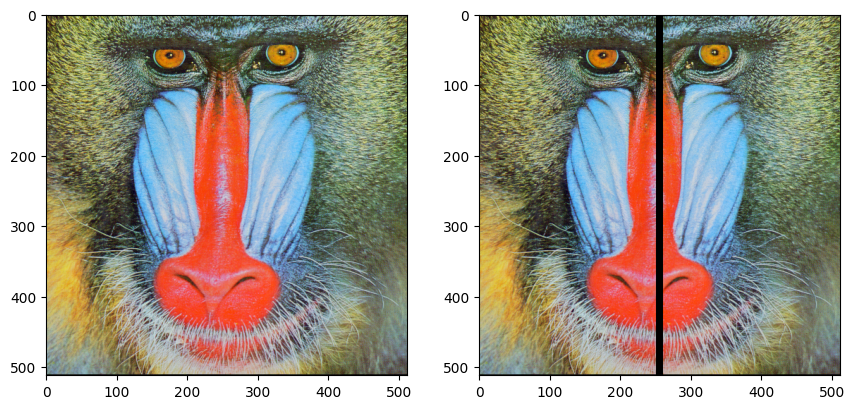

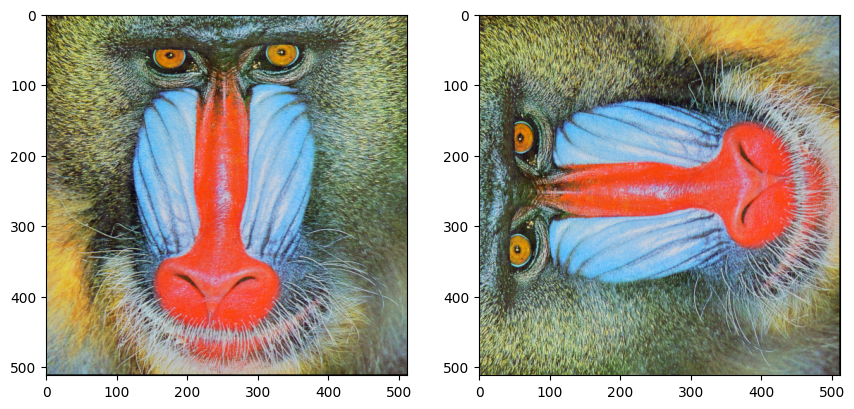

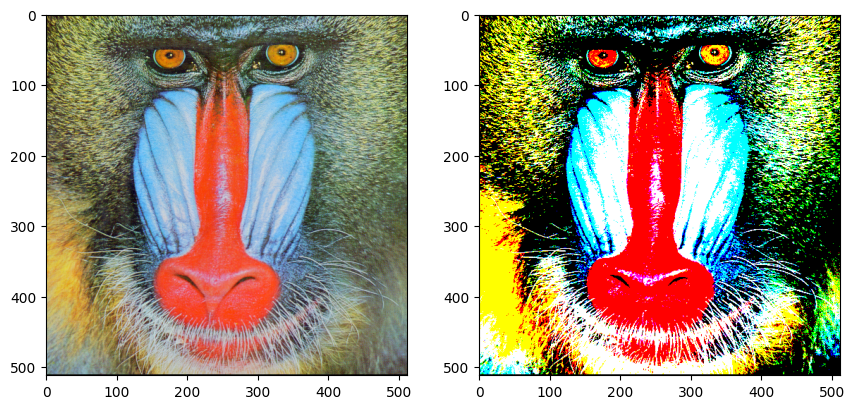

In [24]:
def q1(String = 'q1a'):
    
    '''Function that completes questions 1a, 1b and 1c. The required inputs for this function is a string (parameter: String, must be 'q1a', 'q1b', 'q1c').
        Image and altered image arrays are created using matplotlib commands, and then steps to solve 1a, 1b or 1c are applied depending on input string.
    '''
    
    original = plt.imread('mandrill.png')
    altered = original.copy()
    
    if String == 'q1a': #this solves 1a

        mid = np.shape(altered)[0] // 2                     #gives integer value for mid-point of image
        altered[:,mid-5:mid+5,0:3] = 0                      #sets the (x,y) values that are +- 5 from the midpoint to 0
    
    elif String == 'q1b': #this solves 1b
        for i in range(3):                                  #need for loop because we don't want to transpose RGBA elements, just the x,y coordinates for each RGBA
            altered[:,:,i]=np.transpose(altered[:,:,i])     #sets all (x,y) to (y,x) for each RGB color
        
    elif String == 'q1c': #this solves 1c
        altered = np.round(original)                        #uses numpy to round every value to either 0 or 1
        
        # this is a much slower method that does the same thing, but I kept it as a comment to easily visualize what the "round" function is doing    
        # for row in range (0,np.shape(original)[0]):
        #     for column in range (0,np.shape(original)[1]):
        #         for color in range(0, 3):
        #             if original[row][column][color] >= 0.5:
        #                 altered[row][column][color]=1
        #             else:
        #                 altered[row][column][color]=0
        
    display_img(original, altered)
    
q1('q1a')
q1('q1b')
q1('q1c')


---------

### Question 2

To rotate an $n$-row, $m$-column image by an angle $\theta$ in the anticlockwise direction, pixel location $[i,j]$ in the rotated (new) image corresponds to pixel location $[x,y]$ in the original image, where

$$ x = (i-n/2)\cos(\theta)+(j-m/2)\sin(\theta)+n/2 $$

$$ y= -(i-n/2)\sin(\theta)+(j-m/2)\cos(\theta)+m/2 $$

With a few notes:

1. If $[x,y]$ falls outside the range of the original image (which happens on the edges of the rotated image), a fill color should used. Please use black for this assignment.
2. The values of $x$ and $y$ will generally be non-integer, so this rotation requires evaluation of the image data at locations that are not exactly on pixel centers in the original image. In other words, some sort of interpolation scheme is required. For this assignment, please simply round to the nearest integer. This is known as "nearest neighbor" interpolation. Bi-linear interpolation or other interpolation schemes are also sometimes used, but just take the simple nearest neighbor for this assignment.

a. Load the mandrill image and rotate it 20 degrees anticlockwise using the equations above implemented in a nested loop. Include all the calculations (even the trig functions) in the loop. Time the execution using %timeit. Plot the original and rotated images.

b. Repeat question 2a, but pull the trig functions and anything else you can pre-calculate outside the loops and rotate the original image 20 degrees clockwise.

c. Repeat question 2b, but use Just-In-Time compilation and rotate 30 degrees anticlockwise.

d. Repeat question 2a, but use PIL (Python Image Library) to perform the rotation and rotate 30 degrees clockwise.

e. Prepare a table of how long each method took. In a few sentences, comment on the speed of the various methods and why you think there was such a difference.


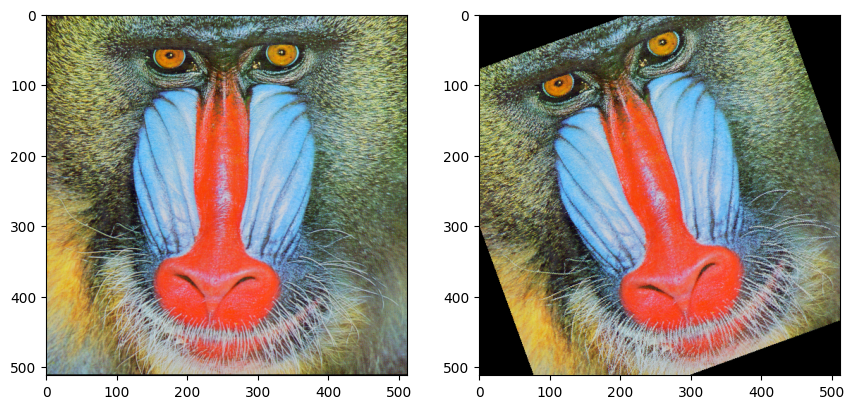

In [25]:
def q2a(angle):

    '''This function rotates the image counter-clockwise at whatever the inputted angle is. This function is desigend to be "naive" or slow.
        The only required input for this function is a angle value (parameter: angle, constant of int or float).'''
    
    original = plt.imread('mandrill.png')
    altered = original.copy()
    
    #dimensions of image
    n = np.shape(original)[0]
    m = np.shape(original)[1]
    
    for row in range(n):
        for column in range(m): 
            
            theta = angle * np.pi / 180                                                     #converts inputted angle from degrees to radians
            newx = round((row-n/2)*np.cos(theta) + (column-m/2)*np.sin(theta) + n/2)        #given x formula
            newy = round(-(row-n/2)*np.sin(theta) + (column-m/2)*np.cos(theta) + m/2)       #given y formula
            
            if (newx <= 0 or newx >= n) or (newy <= 0 or newy >= m):                        #if statement is checking if rotated pixel is inside or outside original (x,y) range
                altered[row][column]=[0,0,0,1]                                              #if it is, then pixel becomes black
            else:
                altered[row][column] = original[newx][newy]                                 #else, it is saved
    
    return(original, altered)
    #display_img(original, altered)

#%timeit q2a(20)
images = q2a(20)
display_img(images[0],images[1])


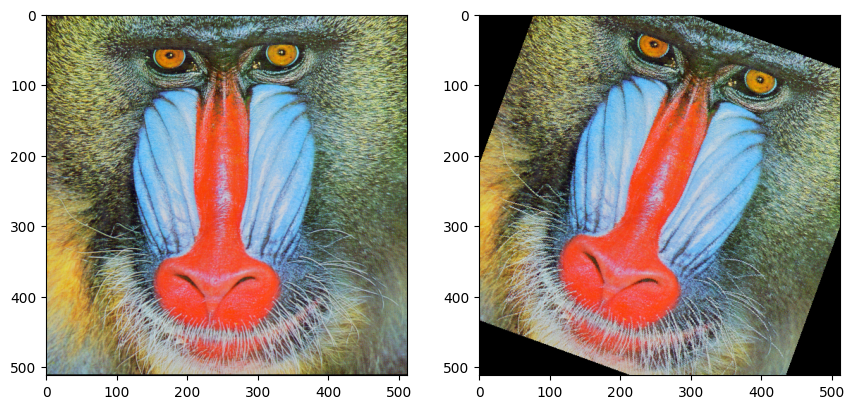

In [26]:
def q2b(angle):

    '''This function is the same as q2a, except calculations are pulled outside of the loop to improve computation time. Therefore, much less commmented
        The only required input for this function is a angle value (parameter: angle, constant of int or float).
    '''
    
    original = plt.imread('mandrill.png')
    altered = original.copy()
    
    n = np.shape(original)[0]
    m = np.shape(original)[1]
 
    #theta, cosine, sine, halfn and halfm are the same for each loop so they got pulled out.
    theta = angle * np.pi / 180
    cosine = np.cos(theta)
    sine = np.sin(theta)
    halfn = n/2
    halfm = m/2
    
    #otherwise, for loop works exactly the same as in q2a
    for row in range(n):
        for column in range(m): 
            
            newx = round((row-halfn)*cosine + (column-halfm)*sine + halfn)
            newy = round(-(row-halfn)*sine + (column-halfm)*cosine + halfm)
            
            if (newx <= 0 or newx >= n) or (newy <= 0 or newy >= m):
                altered[row][column]=[0,0,0,1]
            else:
                altered[row][column] = original[newx][newy]
    
    return(original, altered)
    
#%timeit q2b(-20)
images = q2b(-20)
display_img(images[0],images[1])

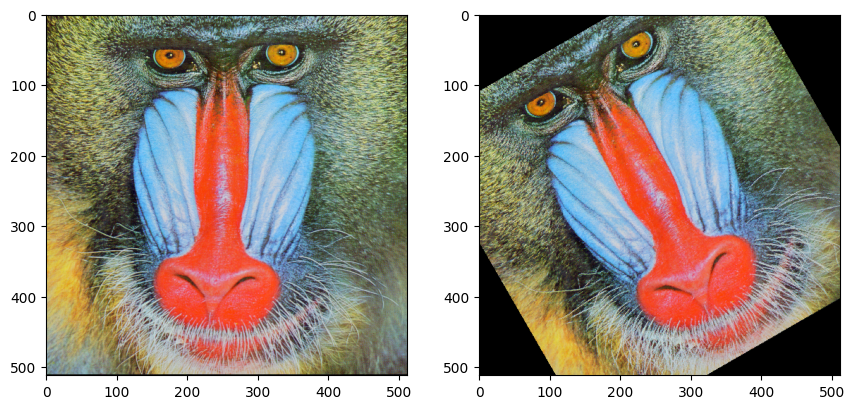

In [27]:
from numba import jit

@jit(nopython=True)
def q2c(img, n, m, angle):

    '''This function is very similar to q2b, however Just-In-Time compilation is applied to improve computation time. A few of the matplotlib and numpy commands
        have been pulled out of the function and turned into parameters so the compilation works properly.

        The required inputs for this function are an image (parameter: img, numpy array of dimension [ [x], [y], [z] ]), image dimensions (parameters: n, m, constants of type int),
        and a angle value (parameter: angle, constant of int or float).
    '''
    
    #theta, cosine, sine, halfn and halfm are the same for each loop so they got pulled out.
    altered = img.copy()
    theta = angle * np.pi / 180
    cosine = np.cos(theta)
    sine = np.sin(theta)
    halfn = n/2
    halfm = m/2
    
    #otherwise, for loop works exactly the same as in q2a
    for row in range(n):
        for column in range(m): 
            
            newx = round((row-halfn)*cosine + (column-halfm)*sine + halfn)
            newy = round(-(row-halfn)*sine + (column-halfm)*cosine + halfm)
            
            if (newx <= 0 or newx >= n) or (newy <= 0 or newy >= m):
                altered[row][column]=[0,0,0,1]
            else:
                altered[row][column] = img[newx][newy]
                
    return(img, altered)

mandrill = plt.imread('mandrill.png')

#%timeit q2c(mandrill, np.shape(mandrill)[0],np.shape(mandrill)[1], 30)
images = q2c(mandrill, np.shape(mandrill)[0], np.shape(mandrill)[1], 30)
display_img(images[0],images[1])
    



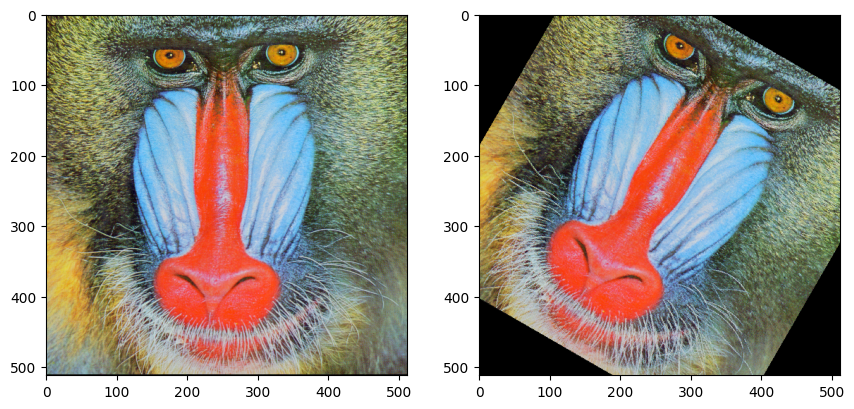

In [28]:
from PIL import Image

def q2d(angle):

    '''This function uses the Pillow Library to rotate the image instead matplotlib and rotating it manually like we did in 1a, 1b and 1c.
      
        The only required input for this function is a angle value (parameter: angle, constant of int or float).
    '''

    original = Image.open('mandrill.png', 'r')
    return (original, original.rotate(angle, fillcolor='black'))

#%timeit q2d(-30)
images = q2d(-30)
display_img(np.asarray(images[0]),np.asarray(images[1]))

Table and comments for question 2e go here. You can use Markdown for tables like this:

| Method | Time Elapsed (Laptop) | Time Elapsed (Desktop) | Comments |
|--------|----------------------|----------------------|----------|
| Nested Loops |2.45 s ± 335 ms  |1.4 s ± 40.1 ms|The slowest method, least optimized and required the most calculations to preform. The CPU difference between my laptop and desktop really shows here, as my desktop is nearly twice as fast as my laptop.  |
| Optimized Loops |1.34 s ± 164 ms  |698 ms ± 36.6 ms| A bunch of the calculations being preformed each loop, and it ran almost twice as fast. Still shows the CPU difference between the desktop and laptop. |
| JIT Compilation |15.1 ms ± 1.38 ms |8.39 ms ± 746 µs|The fastest method on desktop, second fastest on my laptop. The reason this method is so fast is because a bunch of the code was compiled directly into machine code right at the beginning, making each loop run substantially faster. Again, the CPU difference can be seen here between the two.|
| PIL Library |9.85 ms ± 486 µs |9.58 ms ± 139 µs|The fastest method on laptop, and nearly the fastest method on desktop. This method is fast beacause it is using established libraries of highly optimized code, and avoids using the python interpreter which is the primary thing that slows python programs down. This can interestingly be seen in how the run time was comparable for both the laptop and desktop, meaning the CPU power was much less important for this method than it was for the rest of the methods. |

-------

### Question 3

Image arrays can be usefully filtered by 2D centered FIR filters:

$$ y'_{i,j}=\sum_{m=-m_1}^{m_1}\sum_{n=-n_1}^{n_1}a_{m,n}y_{i,j}$$

These filters can perform many different functions including blurring, sharpening and edge detection. The coefficient array $a_{m,n}$ is known as the filter "kernel", and has size $2m_1+1$ by $2n_1+1$. Filter kernels are usually square, with $m_1=n_1$. This filtering operation is known as 2D convolution.

Edge detection is usually accomplished by smoothing (to remove image noise) and then applying a derivative operator. Further nonlinear operations can be used to refine the edges by suppressing weak edges, joining strong edges, etc. A commonly-used derivative kernel is the Sobel operator. For the horizontal (x) derivative, the Sobel operator is:

$$ S_x= \left[ \begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \end{array} \right]  $$

and the vertical derivative uses the transpose $S_y=S_x^T$. These are simple extensions of the 1D 3-point stencil derivative operator from last week. The gradient magnitude of array $A$ is then $G=\sqrt{(S_x * A)^2+(S_y * A)^2}$ where the $*$ symbol denotes 2D convolution and the square root is taken on each element of the array individually.

Another commonly used filter kernel is the Laplacian ($\nabla^2$) kernel

$$ L = \left[ \begin{array}{ccc}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 \end{array} \right]  $$

which detects second derivatives. This is sometimes used in image sharpening filters, which take the form

$$ K = \left[ \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \end{array} \right] +\alpha L$$

where the degree of sharpening can be controlled by $\alpha$.

Start by writing a general function to apply an arbitrary filter (2D convolution) of the type described above, and then answer the following questions. Your function may discard the edge points where the filter cannot be applied ($m_1$ points from each of the 2 edges in the first dimension and $n_1$ from the 2 edges in the second dimension).

a. Load the mandrill image again, and perform a "boxcar smoothing" with a 15x15 kernel of the form $a_{m,n}=1/15^2$. Display the original and smoothed images.

b. Load the "peppers.png" image and apply a 5x5 boxcar smoothing. Find the gradient magnitude $G$ using the Sobel operator on each channel (R,G,B) and sum them to get an overall gradient. Apply a threshold of 30% of the maximum gradient to discard weak edges (that is, if the gradient is less than 30% of the max, set the RGB values to 0,0,0 and otherwise set R,G,B=1,1,1). Plot the original image and the processed edges.

c. Load the "eye.png" image and apply a Laplacian sharpening filter with kernel $K$ as given above and $\alpha=0.3$ (moderate sharpening) and then with $\alpha=3.0$ (extreme sharpening). This filter may cause some of the RGB values to go outside their nominal [0,1] range; they should be clipped to constrain the range. Plot the original image and the sharpened image for both values of $\alpha$.


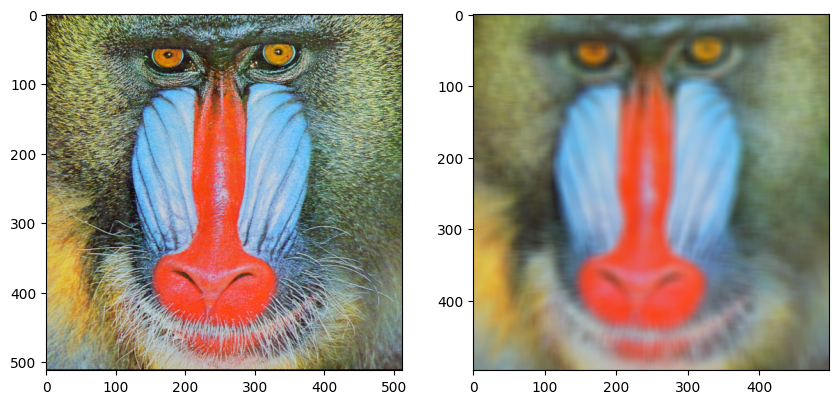

In [29]:
def q3a(original, kernel):
    
    '''This function preforms a 2d-convolution on an inputted image (parameter: original, numpy array of dimension [ [x], [y], [z] ]) and it uses an inputted kernel 
        (parameter: kernel, numpy array of dimension [ [x], [y] ]).
        
        The function clips off the length of the kernel (dentoed as n1 or m1) + 1 of the original image in both the x and y directions. The nested for loop then runs
        and multiplies all 0:(n + 1 - n1) indices in the original image by the inputted kernel value. This process is then repeated for 1:(1 + n + 1 - n1) and so on
        until n1:(n1 + n + 1 - n1). When the boxcar kernel is applied, after enough time the overlapping pixels getting saved everytime the function loops will become 
        "bigger" in value, but still different from their original values which creates the "smearing" or blurring effect.'''
    
    #inputted image dimensions
    n = np.shape(original)[0]
    m = np.shape(original)[1]

    #kernel dimensions, used for for loops. for q3a, m1=n1=15
    m1=np.shape(kernel)[0]
    n1=np.shape(kernel)[1]
    
    #This creates the output array. for q3a, this creates a (498,498) array filled with zeros
    altered=np.zeros((n-m1+1,m-n1+1,4))
    for row in range(n1): #looping for every row in the kernel
        for column in range(m1): #looping for every column in kernel
            for color in range(3): #looping for RGB
                altered[:,:,color] =  altered[:,:,color] + original[row:row+(-n1+1+n), column:column + (-m1+1+m), color]*kernel[row,column]

                
                # numbers in following comments only apply for use of fuction in q3a:
                # -n1+1+n = 498, so the slices of the original image are the same size as the altered array. all 0-498 pixels are multiplied by value in kernel
                # for that specific indice and then added to output array. Then 1-499 is multiplied by kernel indice and added to array and so on until finally 14:512.
                # Every time the loop runs, the overlapping pixels that are getting saved everytime will become "bigger" but will still different from their original values
                # Which is what causes the "blurring" effect when a boxcar kernel is applied.
                
    altered[:,:,3] = 1 #sets all "alpha" to 1
    return(altered)

kernel = np.full((15,15), 1/(15**2)) #sets a 15x15 array filled with all 1/225 values for the kernel
original = plt.imread('mandrill.png') 

altered = q3a(original, kernel)
display_img(original,altered)

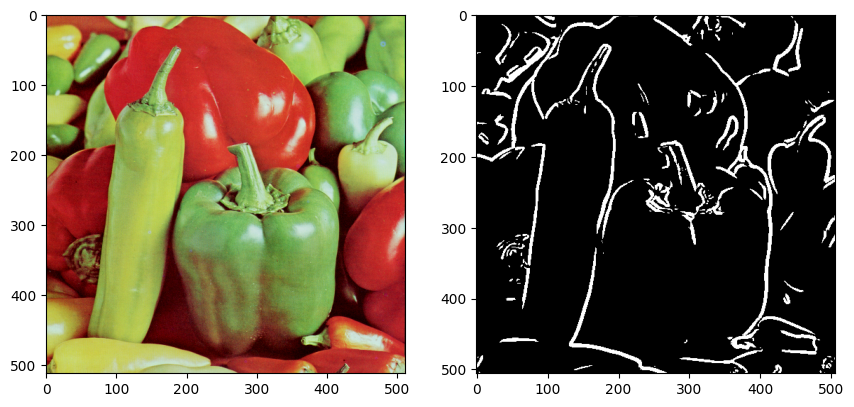

In [30]:
def q3b(original):

    '''This function takes the 2d-convolution function we made in the previous question, and applies the sobel kernel to do edge detection. The only required
        input is an image (parameter: original, numpy array of dimension [ [x], [y], [z] ])
        
        First, a (5x5) boxcar smoothing is done to the image which will help a bit with edge detection. Then we use the regular and transposed sobel
        kernels in the 2d-convolution function to create the Sx * A and Sy * A matrices (labeled as Sx and Sy). We will take the magnitude of these added
        together to get the filtered image. We then add all of the (x, y) values for each RGB together to create our gradient, and then we will normalize our gradient
        by dividing every indice in it by whatever is its largest value. Finally, we get to the nested loop that verifies if the specified indice in the gradient matrix 
        is greater than or equal to 30% of the max, and sets the RGB value to either 0 or 1. '''
    
    boxcar_kernel = np.full((5,5), 1/(5**2))                    #5x5 array filled with 1/25 in every element
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])       #sobel operator

    blurred = q3a(original, boxcar_kernel)                      #applies boxcar smoothing using 2d convolution function from 3a
    Sx = q3a(blurred, sobel_kernel)                             #2d convolution using sobel operator and smoothed image. This is doing horizontal edge detection
    Sy = q3a(blurred, np.transpose(sobel_kernel))               #2d convolution using transposed sobel operator and smoothed image. This is doing vertical edge detection
    filtered = np.sqrt(Sx**2 + Sy**2)                           #combines edge detection in x and y directions by taking their magnitude

    gradient=filtered[:,:,0]+filtered[:,:,1]+filtered[:,:,2]    #adds the filtered values for the RGB channels
    gradient = gradient/np.max(gradient)                        #normalizes gradient by diving every indice by the maximum value in gradient

    for row in range(np.shape(gradient)[0]):
        for column in range(np.shape(gradient)[1]):
            for color in range(3):
                if gradient[row][column] < 0.3:                 #0.3 = 30%
                    filtered[row][column][color] = 0            #sets all lower then 30% to 0
                else:
                    filtered[row][column][color] = 1            #sets all >=30% to 1

    filtered[:,:,3] = 1                                         #sets alpha channel all to 1
    return filtered

original = plt.imread('peppers.png')
display_img(original,q3b(original))

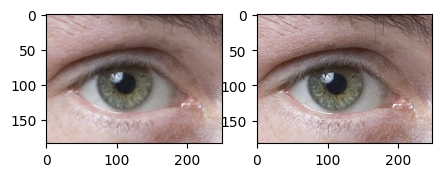

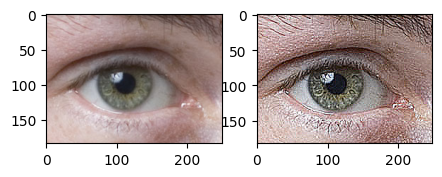

In [31]:
def q3c(original, alpha):
    
    '''This function takes the 2d-convolution function we made in the previous question, and applies the laplace kernel to do sharpen the image. The required inputs for this 
        function are an image (parameter: original, numpy array of dimension [ [x], [y], [z] ]), and a sharpening coefficient (parameter: alpha, constant of type float).

        The Laplacian kernel is able to detect second derivatives, which allows us to detect really sharp edges. We then use the sharpening kernel to sharpen
        the image. The amount of sharpening depends on the value for alpha. '''
    
    laplace_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])                            #given laplacian kernel
    sharpening_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]]) + laplace_kernel*alpha      #given sharpening filter kernel
    
    filtered = q3a(original, sharpening_kernel)                                         #applying 2d-convolution function with sharpening kernel and image
    return filtered

original = plt.imread('eye.png')
moderate = np.clip(q3c(original, 0.3), 0, 1)                                            #alpha = 0.3, numpy is automatically clipping RGB values that are out of the [0,1] range
extreme = np.clip(q3c(original, 3.0), 0, 1)                                             #alpha = 3.0, numpy is automatically clipping RGb values that are out of the [0,1] range

display_img(original, moderate)
display_img(original, extreme)

## Submission

Gradescope has difficulties with Jupyter notebooks larger than 1 MB. For this assignment, your notebook will almost certainly be larger than 1 MB, so please submit your work as a PDF file instead. To create a PDF from your Jupyter notebook:
1.	If you’re using a JupyterLab environment (like syzygy), try selecting File -> “Save and Export Notebook As…”->PDF.
2.	If you’re using Visual Studio Code, click the “…” (More Actions) at the top of the file editing window (beside “Outline”) and select “Export” and then “PDF”.
3.	If you encounter trouble with exporting your PDF (which is not uncommon on many platforms), log into ucalgary.syzygy.ca, upload your .ipynb file and follow step 1.


## Image sources

Mandrill.png and peppers.png are standard test images from the USC Signal and Image Processing Institute available at  https://sipi.usc.edu/database/database.php?volume=misc .

eyes.png is from the Wikipedia page for unsharp masking and is available at https://commons.wikimedia.org/wiki/File:Unsharped_eye.jpg. Image author is Ru_dragon, and the image is distributed under the GNU Free Documentation License.

